In [10]:
# import the necessary packages
from skimage import feature
import numpy as np



class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
 
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints + 3), range=(0, self.numPoints + 2))
 
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
 
        # return the histogram of Local Binary Patterns
        return hist


desc = LocalBinaryPatterns(24, 8)
data = []
labels = []

import imutils
from imutils import paths
import cv2
import os

from sklearn.svm import LinearSVC

# loop over the training images
for imagePath in paths.list_images("Training"):
    # load the image, convert it to grayscale, and describe it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    # extract the label from the image path, then update the
    # label and data lists
    labels.append(imagePath.split(os.path.sep)[-2])
    data.append(hist)
# train a Linear SVM on the data
model = LinearSVC(C=100.0, random_state=42, max_iter=5000)
model.fit(data, labels)


from sklearn.metrics import accuracy_score, classification_report
print(f"accuracy of the model {accuracy_score(model.predict(data), labels)}")
print(" ")
print(" ")
print(" ")



print("The Total Classification report of the model")
print(" ")
print(classification_report(model.predict(data), labels))

accuracy of the model 0.8333333333333334
 
 
 
The Total Classification report of the model
 
              precision    recall  f1-score   support

        Fake       0.90      0.82      0.86        11
        Real       0.75      0.86      0.80         7

    accuracy                           0.83        18
   macro avg       0.82      0.84      0.83        18
weighted avg       0.84      0.83      0.83        18



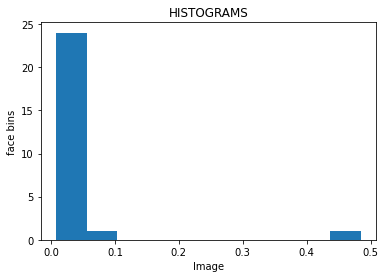

In [11]:
import matplotlib.pyplot as plt

plt.hist(data[4])
plt.title("HISTOGRAMS")
plt.xlabel("Image")
plt.ylabel("face bins")
plt.show()

In [12]:
for imagePath in paths.list_images("Testing"):
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print(gray.shape)
    hist = desc.describe(gray)
    prediction = model.predict(hist.reshape(1, -1))
    cv2.putText(image, prediction[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3)
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    print(prediction)
cv2.destroyAllWindows()


(174, 174)
['Fake']
(112, 112)
['Fake']


In [14]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


import cv2

cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('face_read.xml') 

while cap.isOpened():

    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3,10)

    for (x,y,w,h) in faces: 
        # To draw a rectangle in a face  
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),2)
        face_crop = gray[y:y+h, x:x+w]
        
        print(face_crop.shape)

        # face_crop = cv2.resize(face_crop, (150, 150))
        cv2.imshow("Face_Crop", face_crop)
        
        hist = desc.describe(face_crop)
        prediction = model.predict(hist.reshape(1, -1))
        print(prediction)

        if prediction[0] == "Fake":
            cv2.putText(frame, prediction[0], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3)
        elif prediction[0] == "Real":
            cv2.putText(frame, prediction[0], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
        else:
            pass

    cv2.imshow("image", frame)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

(168, 168)
['Fake']
(174, 174)
['Fake']
(184, 184)
['Fake']
(177, 177)
['Fake']
(182, 182)
['Fake']
(189, 189)
['Fake']
(181, 181)
['Fake']
(179, 179)
['Fake']
(166, 166)
['Fake']
(165, 165)
['Fake']
(151, 151)
['Fake']
(141, 141)
['Fake']
(134, 134)
['Fake']
(136, 136)
['Fake']
(132, 132)
['Fake']
(140, 140)
['Fake']
(145, 145)
['Fake']
(169, 169)
['Fake']
(189, 189)
['Fake']
(212, 212)
['Fake']
(224, 224)
['Fake']
(235, 235)
['Fake']
(232, 232)
['Fake']
(230, 230)
['Fake']
(236, 236)
['Fake']
(229, 229)
['Fake']
(232, 232)
['Fake']
(240, 240)
['Real']
(212, 212)
['Fake']
(228, 228)
['Fake']
(242, 242)
['Real']
(235, 235)
['Real']
(237, 237)
['Real']
(249, 249)
['Real']
(229, 229)
['Real']
(231, 231)
['Fake']
(264, 264)
['Real']
(247, 247)
['Real']
(243, 243)
['Real']
(250, 250)
['Fake']
(246, 246)
['Real']
(254, 254)
['Real']
(253, 253)
['Real']
(246, 246)
['Real']
(257, 257)
['Real']
(241, 241)
['Real']
(250, 250)
['Real']
(265, 265)
['Real']
(267, 267)
['Real']
(258, 258)
['Real']
